# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

Dominik Gaweł

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dg7s/Machine-Learning/blob/main/hw/Principal_Component_Analysis_%28PCA%29_on_3D_Clustered_Data.ipynb)

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.

## Imports

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data preprocessing

In [ ]:
data_url = "https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv"
df = pd.read_csv(data_url)
print(df.head)

<bound method NDFrame.head of             x         y          z  class
0    0.647689 -0.138264   3.512299      0
1   -0.234137 -0.234153  10.769447      0
2   -0.469474  0.767435  11.166721      0
3   -0.465730 -0.463418   3.836479      0
4   -1.724918 -1.913280   1.710932      0
..        ...       ...        ...    ...
295  4.640708  0.583928  13.058193      2
296  5.820482  1.108704   4.176560      2
297  6.169296  1.066675   3.586969      2
298  4.832882  0.648710   9.773340      2
299  4.183064  1.206509   1.037422      2

[300 rows x 4 columns]>


In [ ]:
X = df[['x','y','z']]
y = df['class']

# Center and standardize the data
scaler = StandardScaler()
centered_X = scaler.fit_transform(X)

centered_df = pd.DataFrame(centered_X, columns=X.columns, index=df.index)
centered_df['class'] = y

In [ ]:
# Original
class_stats_original = df.groupby('class').agg(['min', 'max', 'mean'])
formatted_original = class_stats_original.map(lambda x: f"{x:.2f}")
formatted_original = pd.DataFrame(formatted_original)
print("Class-wise Statistics:")
display(formatted_original)

# Centered
class_stats_centered = centered_df.groupby('class').agg(['min', 'max', 'mean'])
formatted_centered = class_stats_centered.map(lambda x: f"{x:.2f}")
formatted_centered = pd.DataFrame(formatted_centered)
print("Centered Class-wise Statistics:")
display(formatted_centered)

Class-wise Statistics:


x                  y                    z             
         min   max  mean    min   max   mean     min    max  mean
class                                                            
0      -2.62  3.85  0.07  -3.24  2.31  -0.18  -13.80  15.16  0.65
1       0.29  4.65  2.51   0.03  5.58   2.39  -16.28  15.48  0.23
2       2.35  7.63  5.10  -2.70  2.53   0.07  -14.72  18.20  0.54

Centered Class-wise Statistics:


x                   y                   z             
         min   max   mean    min   max   mean    min   max   mean
class                                                            
0      -2.26  0.56  -1.08  -2.62  1.02  -0.62  -2.26  2.33   0.03
1      -0.99  0.91  -0.02  -0.48  3.16   1.07  -2.65  2.38  -0.04
2      -0.09  2.21   1.10  -2.26  1.16  -0.45  -2.41  2.81   0.01

In [ ]:
fig_original = px.scatter_3d(df, x='x', y='y', z='z', color=y.astype(str), title='Original Data')
fig_centered = px.scatter_3d(centered_df, x='x', y='y', z='z', color=y.astype(str), title='Centered Data')

fig = make_subplots(rows=1, cols=2, subplot_titles=['Original Data', 'Centered Data'], specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

for trace in fig_original.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_centered.data:
    trace.showlegend = False
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(
    title_text="3D Scatter Plots: Original vs Centered Data",
    height=600,
    width=1200,
    legend=dict(
        title="Class",
        x=1, y=0.5
    )
)

fig.show()


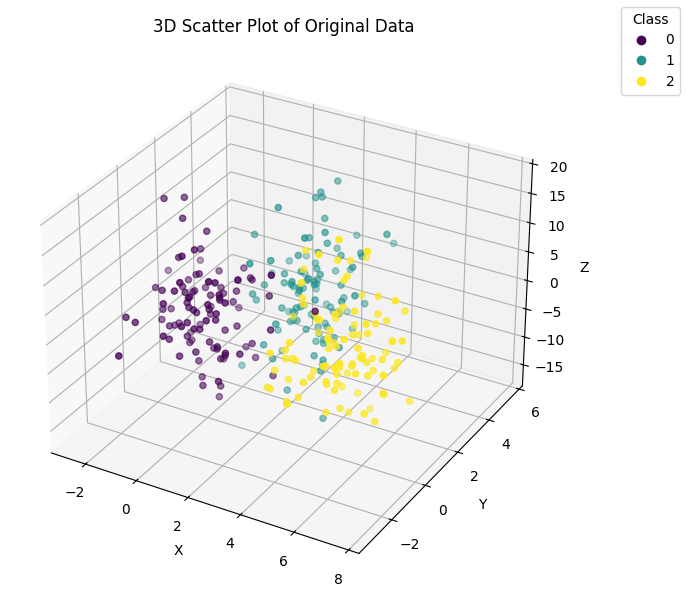

In [ ]:
legend_labels = list(np.unique(y))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['x'], df['y'], df['z'], c=y, cmap='viridis')
ax.set_title('3D Scatter Plot of Original Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Class", loc="upper right")

plt.tight_layout()
plt.show()

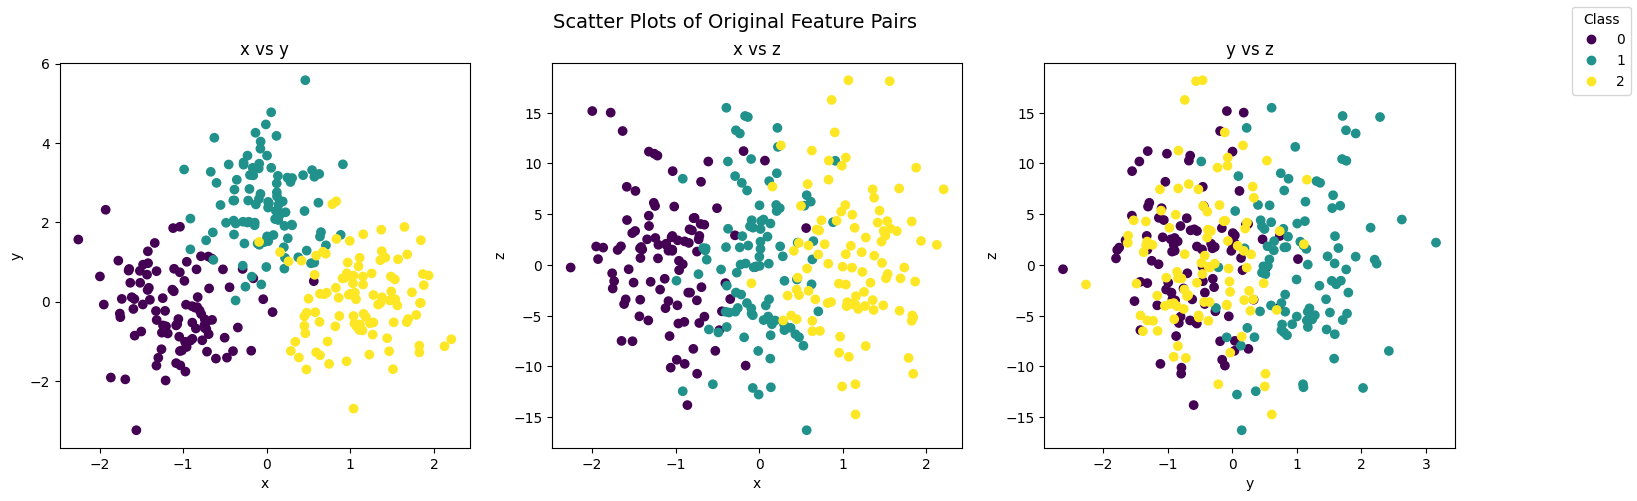

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
feature_pairs = [('x', 'y'), ('x', 'z'), ('y', 'z')]


for i, (f1, f2) in enumerate(feature_pairs):
    scatter = axes[i].scatter(centered_df[f1], df[f2], c=y, cmap='viridis')
    axes[i].set_title(f'{f1} vs {f2}')
    axes[i].set_xlabel(f1)
    axes[i].set_ylabel(f2)

fig.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Class", loc="upper right")
plt.suptitle('Scatter Plots of Original Feature Pairs', fontsize=14)
plt.show()

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
XV = pca.fit_transform(X)

XV_df = pd.DataFrame(XV, columns=['PC1', 'PC2'])
XV_df['class'] = y

In [ ]:
print("The principal components in rows\n")
print(pca.components_)

print("\nX projected on V (first 5 rows)\n")
print(XV[:5,:])
print("\nExplained percentage variance\n")
print(pca.explained_variance_ratio_)
print("\nCumulative explained percentage variance\n")
print(np.cumsum(pca.explained_variance_ratio_))


The principal components in rows

[[-1.07398893e-02  8.40647979e-04  9.99941972e-01]
 [ 9.99078354e-01  4.15697634e-02  1.06956660e-02]]

X projected on V (first 5 rows)

[[ 3.05824099 -1.91725482]
 [10.3243579  -2.72463364]
 [10.72497785 -2.91386929]
 [ 3.39408622 -3.03969616]
 [ 1.28096705 -4.3807283 ]]

Explained percentage variance

[0.83996129 0.11106345]

Cumulative explained percentage variance

[0.83996129 0.95102474]


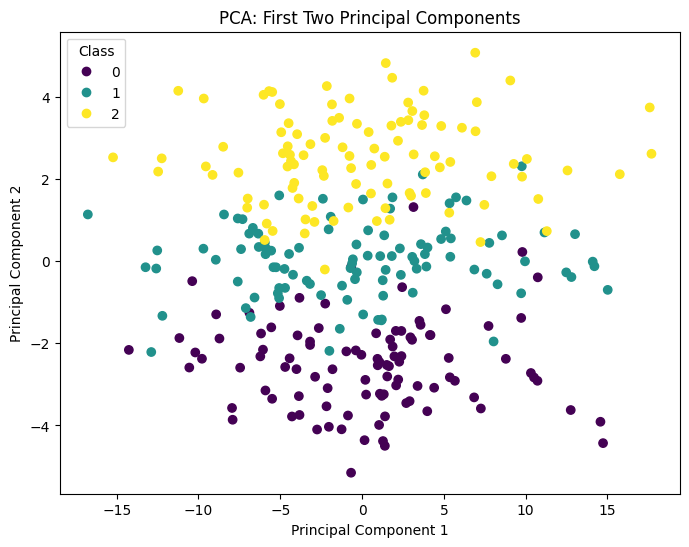

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(XV_df['PC1'], XV_df['PC2'], c=y, cmap='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Class")
## **Primary Question**
plt.show()

# **Question Answers**

## **Primary Question**

- **Original 2D Plots:**  
  - (*x vs. y*) and (*x vs. z*) clearly show three clusters, whereas (*y vs. z*) does not.

- **PCA:**  
  - The PCA plot closely resembles the *z vs. x* view, as indicated by the principal components:
    ```
    [[-1.07398893e-02  8.40647979e-04  9.99941972e-01]
     [ 9.99078354e-01  4.15697634e-02  1.06956660e-02]]
    ```
  - The first component aligns almost entirely with the z-axis, while the second is nearly along the x-axis.

- **Why PCA Improves Separation:**  
  In our case, the 3D plot reveals three nearly non-intersecting, well-separated groups. PCA rotates the data to maximize variance along the new axes, further reducing cluster overlap. Such clear separation depends on the intrinsic structure of the data and may not occur in every dataset.

## **Secondary Question**

- PCA seeks directions of maximum variance; without standardization, features with larger scales can dominate.
- Standardizing by subtracting the mean (removing translation) and dividing by the standard deviation ensures all features have unit variance.
- This lets PCA reveal the true structure of the data without bias from differing scales.